In [1]:
import random as rd
import networkx as nx
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2
import opdproblem as opd

es el grafo  k4
++++++++++
es la instancia:  0
----------
0
68.26269246520866 78.94468352537768 68.26269246520866 [0, 1] [(0, 1)]
[(0, 1)]


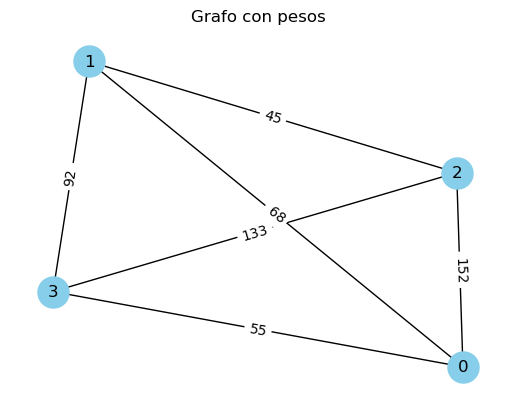

0
68.26269246520866 78.94468352537768 68.26269246520866 [0, 1] [(0, 1)]
[(0, 1)]


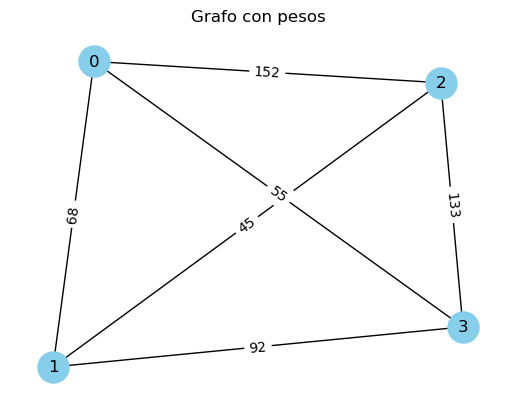

0
68.26269246520866 78.3563005460738 68.26269246520866 [0, 1] [(0, 1)]
[(0, 1)]


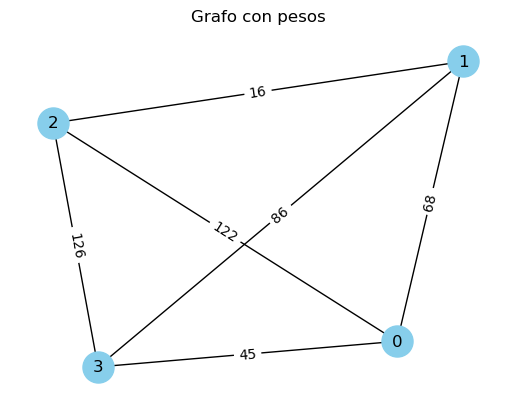

es la instancia:  1
----------
0
143.29001710628597 144.01082123486395 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1)]


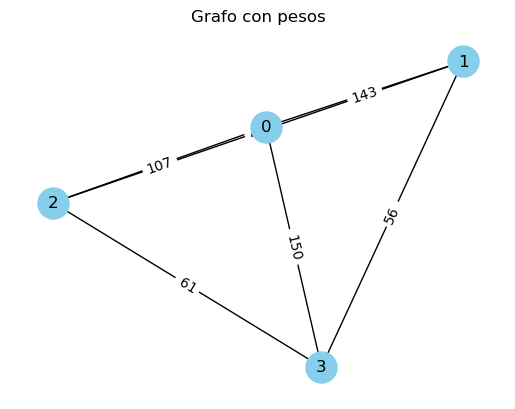

1
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1)]


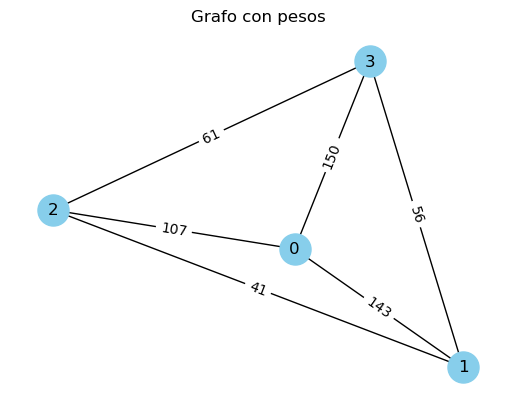

2
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1)]


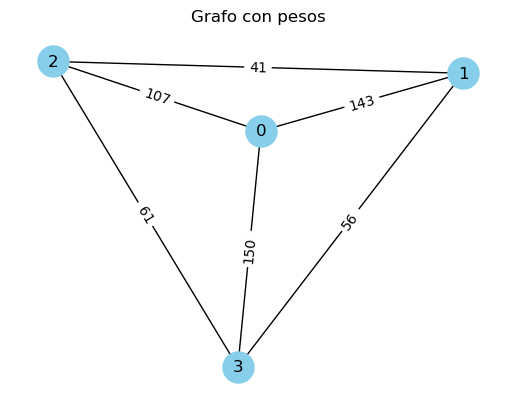

3
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1), (0, 1)]


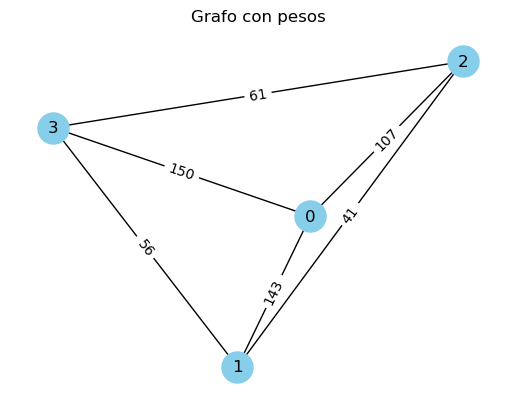

4
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


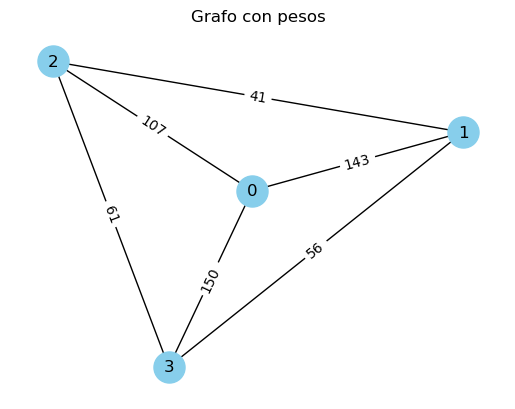

5
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


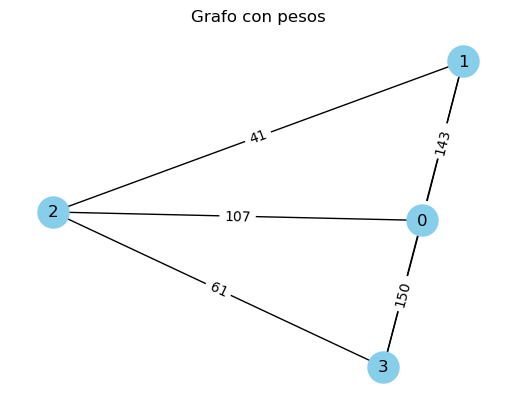

0
143.29001710628597 144.01082123486395 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1)]


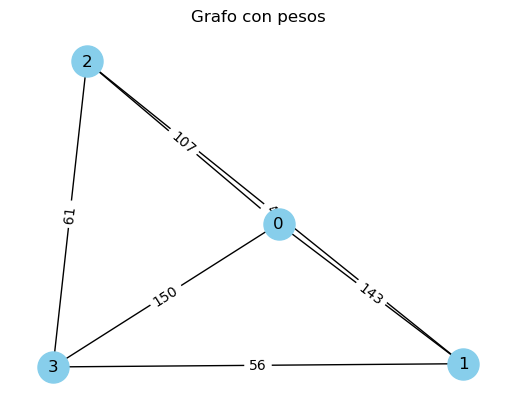

1
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1)]


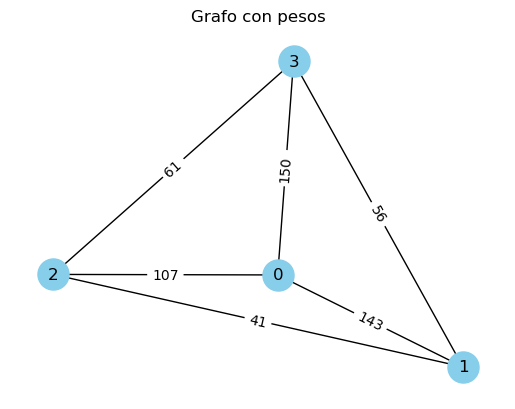

2
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1)]


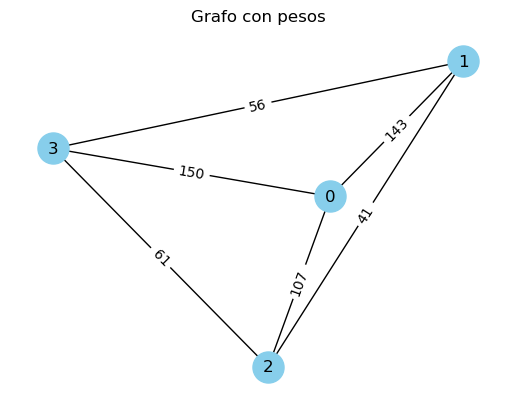

3
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1), (0, 1)]


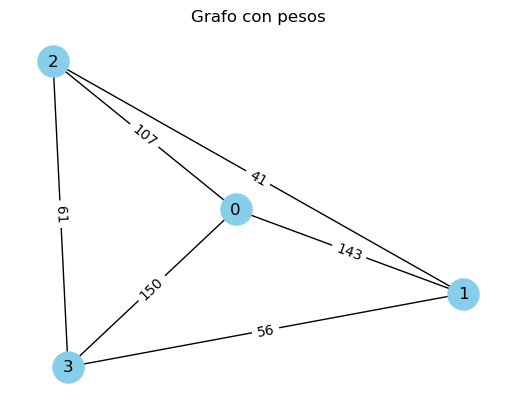

4
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


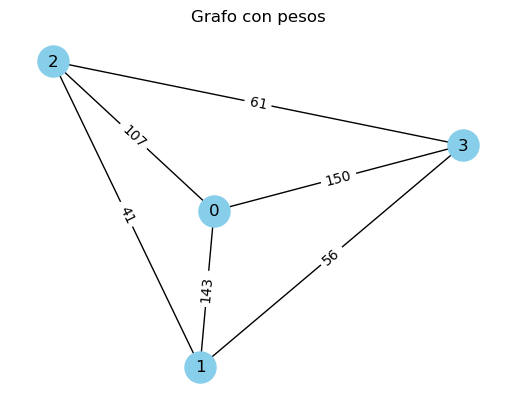

5
143.29001710628597 143.29001710628597 102.71469502975674 [0, 2, 1] [(0, 1)]
[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


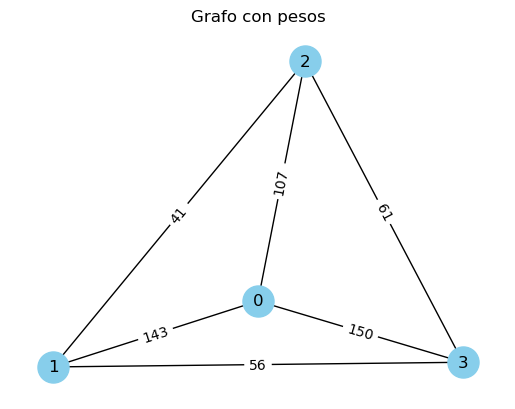

0
129.2935956585599 130.88442332364525 117.19941666212893 [0, 1] [(0, 2), (2, 1)]
[(0, 2), (2, 1)]


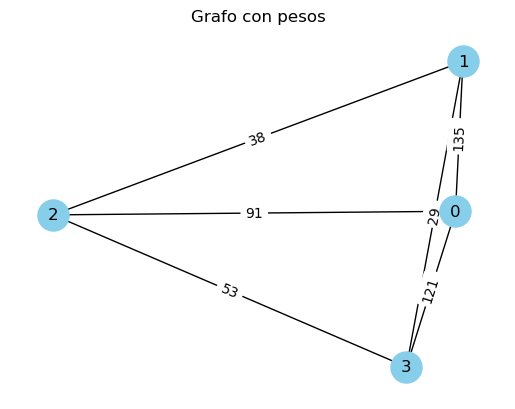

1
129.2935956585599 129.2935956585599 117.19941666212893 [0, 1] [(0, 2), (2, 1)]
[(0, 2), (2, 1), (0, 2), (2, 1)]


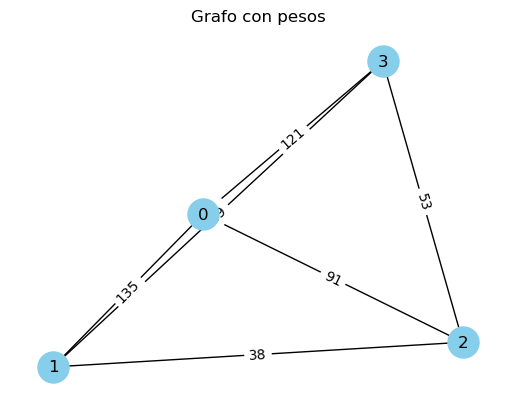

2
129.2935956585599 129.2935956585599 117.19941666212893 [0, 1] [(0, 2), (2, 1)]
[(0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1)]


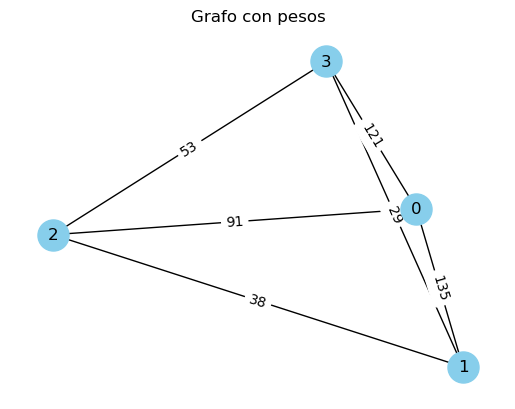

3
129.2935956585599 129.2935956585599 117.19941666212893 [0, 1] [(0, 2), (2, 1)]
[(0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1)]


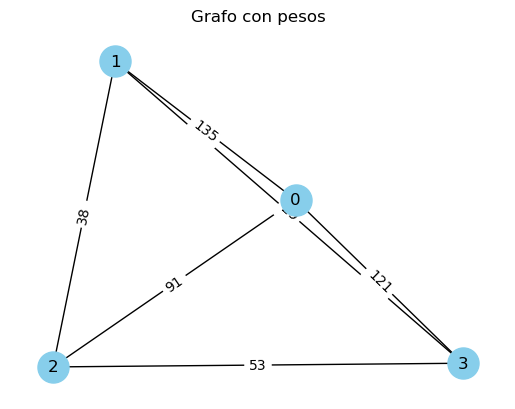

4
129.2935956585599 129.2935956585599 117.19941666212893 [0, 1] [(0, 2), (2, 1)]
[(0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1)]


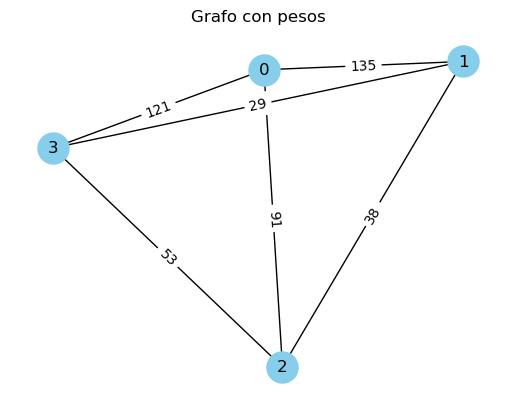

5
129.2935956585599 129.2935956585599 117.19941666212893 [0, 1] [(0, 2), (2, 1)]
[(0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, 1)]


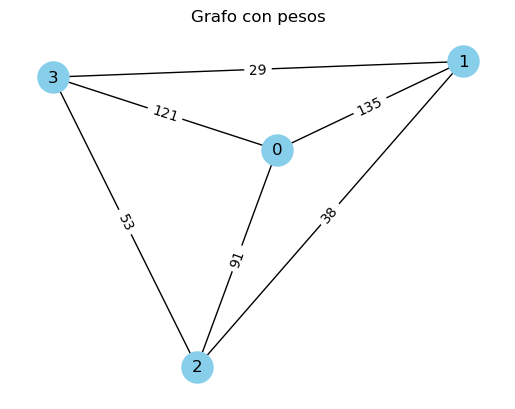

es la instancia:  2
----------
0
150.01710964002825 158.79981024509647 150.01710964002825 [0, 1] [(0, 1)]
[(0, 1)]


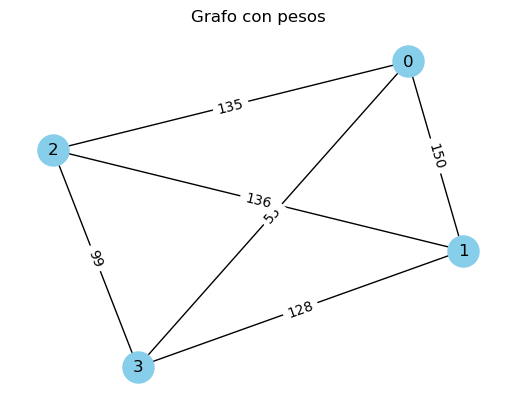

0
150.01710964002825 158.79981024509647 150.01710964002825 [0, 1] [(0, 1)]
[(0, 1)]


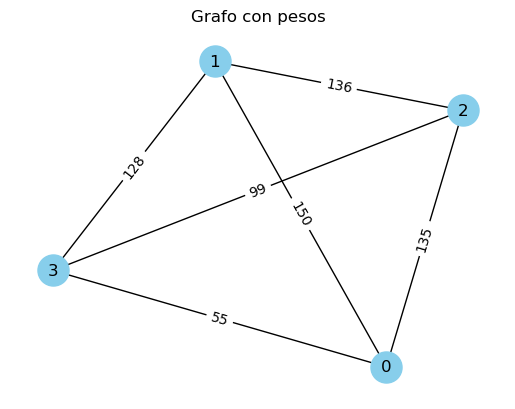

0
150.01710964002825 142.0746235064346 150.01710964002825 [0, 1] [(0, 1)]
[(0, 1)]


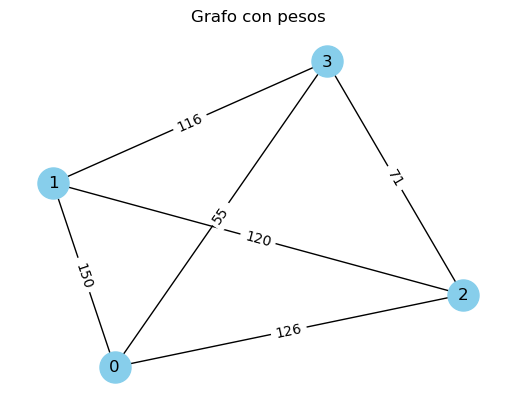

es la instancia:  3
----------
0
59.05642502832961 81.94118333836863 59.05642502832961 [0, 1] [(0, 1)]
[(0, 1)]


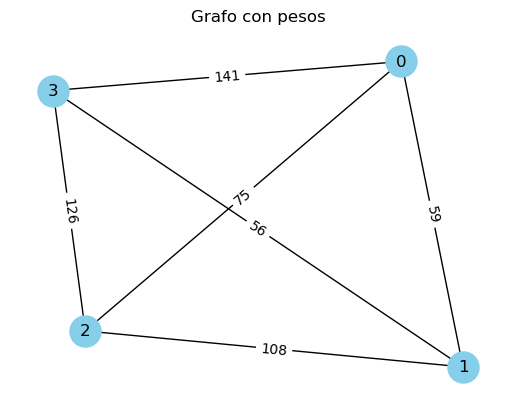

0
59.05642502832961 81.94118333836863 59.05642502832961 [0, 1] [(0, 1)]
[(0, 1)]


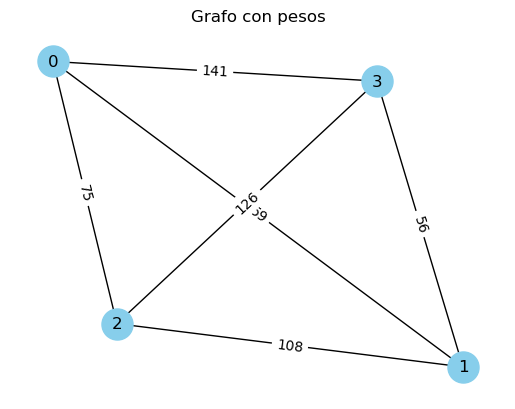

0
59.05642502832961 78.48089906462997 59.05642502832961 [0, 1] [(0, 1)]
[(0, 1)]


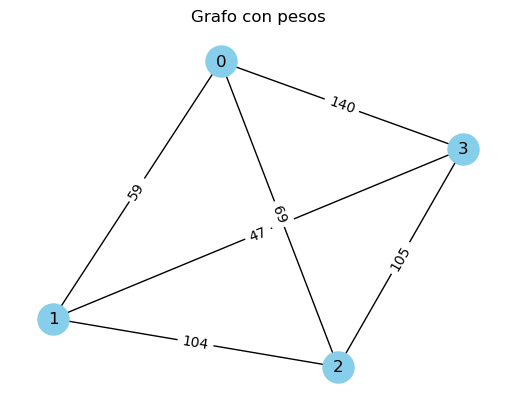

In [19]:
cert_dic = {}
opd.seed(42)

for n in range(4, 5):

    print(f'es el grafo  k{n}')
    print('+' * 10)
    for i in range(4):
        print('es la instancia: ', i)
        print('-' * 10)

        # se inicializa el grafo y el algoritmo
        G = opd.OPDGraph(n=n)
        search = opd.Alg(G)

        # Se busca el alpha-certificado
        search_inf = search.search_app(method='sup')
        search_sup = search.search_app(method='sup')
        search_random = search.search_app(method='random')
        
        # Se guardan los datos
        cert_dic[(f'k{n}', 'inf', f'inst{i}')] = search_inf
        cert_dic[(f'k{n}', 'sup', f'inst{i}')] = search_sup
        cert_dic[(f'k{n}', 'random', f'inst{i}')] = search_random

In [4]:
dfs = {}
for k in range(4, 10):  
    # Filtrar las claves del diccionario por la clave k actual
    filtered_keys = [key for key in cert_dic.keys() if key[0] == f'k{k}']
    
    # Crear un diccionario temporal para almacenar los datos filtrados
    temp_data = {}
    
    # Llenar el diccionario temporal con los datos filtrados
    for key in filtered_keys:
        inf_sup = key[1]
        inst = key[2]
        if inst not in temp_data:
            temp_data[inst] = {'inf': None, 'sup': None}
        temp_data[inst][inf_sup] = cert_dic[key]
    
    # Crear un DataFrame para el conjunto filtrado y agregarlo a dfs
    df = pd.DataFrame(temp_data).transpose()
    df.index.name = 'inst'
    dfs[f'k{k}'] = df

In [5]:
dfs['k4']

,inf,sup,random
inst,,,
inst0,"[[(0, 1)], [0, 1], 68.26269246520866]","[[(0, 1)], [0, 1], 68.26269246520866]","[[(0, 1)], [0, 1], 68.26269246520866]"
inst1,"[[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, ...","[[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, ...","[[(0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (2, ..."
inst2,"[[(0, 1)], [0, 1], 150.01710964002825]","[[(0, 1)], [0, 1], 150.01710964002825]","[[(0, 1)], [0, 1], 150.01710964002825]"
inst3,"[[(0, 1)], [0, 1], 59.05642502832961]","[[(0, 1)], [0, 1], 59.05642502832961]","[[(0, 1)], [0, 1], 59.05642502832961]"


In [21]:
cert_dic[('k4', 'inf')][1]

[[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)], [0, 1], 143.29001710628597]

In [11]:
cert_dic.keys()

dict_keys([('k4', 'inf', 'inst0'), ('k4', 'sup', 'inst0'), ('k4', 'random', 'inst0'), ('k4', 'inf', 'inst1'), ('k4', 'sup', 'inst1'), ('k4', 'random', 'inst1'), ('k4', 'inf', 'inst2'), ('k4', 'sup', 'inst2'), ('k4', 'random', 'inst2'), ('k4', 'inf', 'inst3'), ('k4', 'sup', 'inst3'), ('k4', 'random', 'inst3'), ('k5', 'inf', 'inst0'), ('k5', 'sup', 'inst0'), ('k5', 'random', 'inst0'), ('k5', 'inf', 'inst1'), ('k5', 'sup', 'inst1'), ('k5', 'random', 'inst1'), ('k5', 'inf', 'inst2'), ('k5', 'sup', 'inst2'), ('k5', 'random', 'inst2'), ('k5', 'inf', 'inst3'), ('k5', 'sup', 'inst3'), ('k5', 'random', 'inst3'), ('k6', 'inf', 'inst0'), ('k6', 'sup', 'inst0'), ('k6', 'random', 'inst0'), ('k6', 'inf', 'inst1'), ('k6', 'sup', 'inst1'), ('k6', 'random', 'inst1'), ('k6', 'inf', 'inst2'), ('k6', 'sup', 'inst2'), ('k6', 'random', 'inst2'), ('k6', 'inf', 'inst3'), ('k6', 'sup', 'inst3'), ('k6', 'random', 'inst3'), ('k7', 'inf', 'inst0'), ('k7', 'sup', 'inst0'), ('k7', 'random', 'inst0'), ('k7', 'inf', 